## 数据预览

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
player1=pd.read_csv('p1.csv')


In [130]:
player1.head()

,id,label,p1_games,p1_score_diff,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,0,1,0,95.0,-5.000,0.825,1
1,2023-wimbledon-1301,1,0,-15,1,0,118.0,-4.253,0.825,0
2,2023-wimbledon-1301,0,0,0,1,0,120.0,-12.800,0.825,1
3,2023-wimbledon-1301,1,0,-15,1,0,130.0,-50.108,0.825,0
4,2023-wimbledon-1301,1,0,0,1,0,112.0,0.351,0.825,0


In [131]:
player1.drop(['p1_score_diff'], axis=1, inplace=True)

In [132]:
player1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7284 entries, 0 to 7283
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7284 non-null   object 
 1   label                 7284 non-null   int64  
 2   p1_games              7284 non-null   int64  
 3   server                7284 non-null   int64  
 4   p1_lead               7284 non-null   int64  
 5   speed_mph             7284 non-null   float64
 6   p1_distance_run       7284 non-null   float64
 7   rank_diff_membership  7284 non-null   float64
 8   p1_unf_err            7284 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 512.3+ KB


In [133]:
player1.isnull().sum() 

id                      0
label                   0
p1_games                0
server                  0
p1_lead                 0
speed_mph               0
p1_distance_run         0
rank_diff_membership    0
p1_unf_err              0
dtype: int64

In [134]:
player1.groupby('id').size().value_counts()

300    1
225    1
202    1
159    1
217    1
193    1
283    1
189    1
271    1
331    1
195    1
215    1
286    1
122    1
274    1
167    1
201    1
198    1
185    1
290    1
275    1
170    1
318    1
213    1
190    1
232    1
332    1
246    1
337    1
134    1
334    1
dtype: int64

## 数据预处理

对数据集进行7：3划分训练集和测试集<br>
将id：1301-1406的比赛做为测试集<br>
将id：1407-1701的比赛作为测试集

In [188]:
player1.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,1,0,95.0,-5.000,0.825,1
1,2023-wimbledon-1301,1,0,1,0,118.0,-4.253,0.825,0
2,2023-wimbledon-1301,0,0,1,0,120.0,-12.800,0.825,1
3,2023-wimbledon-1301,1,0,1,0,130.0,-50.108,0.825,0
4,2023-wimbledon-1301,1,0,1,0,112.0,0.351,0.825,0


In [135]:
#取出70%的组作为训练集，30%的组作为测试集
from sklearn.model_selection import train_test_split
train=player1[:5105].copy()
test=player1[5105:].copy()
train.tail()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
5100,2023-wimbledon-1406,1,3,1,0,92.0,-21.374,0.0,0
5101,2023-wimbledon-1406,1,3,1,1,113.0,-0.468,0.0,0
5102,2023-wimbledon-1406,0,3,1,1,116.0,-14.683,0.0,1
5103,2023-wimbledon-1406,1,3,1,1,117.0,-7.480,0.0,0
5104,2023-wimbledon-1406,1,3,1,1,100.0,-23.876,0.0,0


In [136]:
test.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
5105,2023-wimbledon-1407,0,0,1,0,126.0,-21.251,0.725,0
5106,2023-wimbledon-1407,1,0,1,0,123.0,-35.930,0.725,0
5107,2023-wimbledon-1407,1,0,1,0,86.0,-7.062,0.725,0
5108,2023-wimbledon-1407,1,0,1,1,117.0,-15.065,0.725,0
5109,2023-wimbledon-1407,0,0,1,1,126.0,-4.643,0.725,1


In [137]:
#归一化
def normalize(x):
    return (x - x.mean()) / x.std()

train['speed_mph']=normalize(train['speed_mph'])
train['p1_distance_run']=normalize(train['p1_distance_run'])

test['speed_mph']=normalize(test['speed_mph'])
test['p1_distance_run']=normalize(test['p1_distance_run'])


In [138]:
#将极小型数据转换为极大型数据
train['p1_distance_run']=train['p1_distance_run'].max()-train['p1_distance_run']

In [139]:
train.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,1,0,-1.251739,0.460454,0.825,1
1,2023-wimbledon-1301,1,0,1,0,0.592986,0.403128,0.825,0
2,2023-wimbledon-1301,0,0,1,0,0.753397,1.059045,0.825,1
3,2023-wimbledon-1301,1,0,1,0,1.555451,3.922150,0.825,0
4,2023-wimbledon-1301,1,0,1,0,0.111753,0.049806,0.825,0


In [140]:
test.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
5105,2023-wimbledon-1407,0,0,1,0,0.911154,-0.531013,0.725,0
5106,2023-wimbledon-1407,1,0,1,0,0.679674,-1.542881,0.725,0
5107,2023-wimbledon-1407,1,0,1,0,-2.175246,0.447078,0.725,0
5108,2023-wimbledon-1407,1,0,1,1,0.216714,-0.104593,0.725,0
5109,2023-wimbledon-1407,0,0,1,1,0.911154,0.613827,0.725,1


### 特征的进一步筛选使用的是灰色关联分析

## 训练模型

knn

In [142]:
#使用knn算法进行回归拟合
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Y=train['label']
X=train.drop(['label','id'],axis=1)

knn = KNeighborsClassifier()
knn.fit(X, Y)

KNeighborsClassifier()

In [143]:
train.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,1,0,-1.251739,0.460454,0.825,1
1,2023-wimbledon-1301,1,0,1,0,0.592986,0.403128,0.825,0
2,2023-wimbledon-1301,0,0,1,0,0.753397,1.059045,0.825,1
3,2023-wimbledon-1301,1,0,1,0,1.555451,3.922150,0.825,0
4,2023-wimbledon-1301,1,0,1,0,0.111753,0.049806,0.825,0


XGBoost

In [144]:
#使用XGBoost算法进行回归拟合
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

Y=train['label']
X=train.drop(['label','id'],axis=1)
xgb = XGBClassifier()
xgb.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Logistic回归

In [145]:
#使用逻辑回归算法进行回归拟合
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Y=train['label']
X=train.drop(['label','id'],axis=1)

lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression()

SVM

In [146]:
#使用SVM算法进行回归拟合
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

Y=train['label']
X=train.drop(['label','id'],axis=1)


BP神经网络

In [147]:
#使用bp神经网络算法进行回归拟合
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

Y=train['label']
X=train.drop(['label','id'],axis=1)

mlp = MLPClassifier()
mlp.fit(X,Y)

c:\Users\白瑞\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

## 在测试集上测试

In [148]:
train.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err
0,2023-wimbledon-1301,0,0,1,0,-1.251739,0.460454,0.825,1
1,2023-wimbledon-1301,1,0,1,0,0.592986,0.403128,0.825,0
2,2023-wimbledon-1301,0,0,1,0,0.753397,1.059045,0.825,1
3,2023-wimbledon-1301,1,0,1,0,1.555451,3.922150,0.825,0
4,2023-wimbledon-1301,1,0,1,0,0.111753,0.049806,0.825,0


In [149]:
#对测试集进行预测
Y_test=test['label']
X_test=test.drop(['label','id'],axis=1)
Y_knn=knn.predict(X_test)
Y_xgb=xgb.predict(X_test)
Y_lr=lr.predict(X_test)
Y_mlp=mlp.predict(X_test)

test['Knn']=Y_knn
test['XGB']=Y_xgb
test['LR']=Y_lr
test['MLP']=Y_mlp
test.head()

,id,label,p1_games,server,p1_lead,speed_mph,p1_distance_run,rank_diff_membership,p1_unf_err,Knn,XGB,LR,MLP
5105,2023-wimbledon-1407,0,0,1,0,0.911154,-0.531013,0.725,0,1,1,1,1
5106,2023-wimbledon-1407,1,0,1,0,0.679674,-1.542881,0.725,0,1,1,1,1
5107,2023-wimbledon-1407,1,0,1,0,-2.175246,0.447078,0.725,0,1,1,1,1
5108,2023-wimbledon-1407,1,0,1,1,0.216714,-0.104593,0.725,0,1,1,1,1
5109,2023-wimbledon-1407,0,0,1,1,0.911154,0.613827,0.725,1,0,0,0,0


## 模型评估

In [150]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, mean_squared_error, r2_score

def calculate_evaluation_metrics(test_labels, predicted_labels,id):
    auc = roc_auc_score(test_labels, predicted_labels)
    f1 = f1_score(test_labels, predicted_labels)
    precision = precision_score(test_labels, predicted_labels)
    recall = recall_score(test_labels, predicted_labels)
    accuracy = accuracy_score(test_labels, predicted_labels)
    mse = mean_squared_error(test_labels, predicted_labels)
    r2 = r2_score(test_labels, predicted_labels)
    return id,auc, f1, precision, recall, accuracy, mse, r2

evaluation=[[]]

In [151]:
#计算Knn算法的评价指标
evaluation.append(calculate_evaluation_metrics(test['label'], test['Knn'],'Knn'))
#计算XGB算法的评价指标
evaluation.append(calculate_evaluation_metrics(test['label'], test['XGB'],'XGBoost'))
#计算LR算法的评价指标
evaluation.append(calculate_evaluation_metrics(test['label'], test['LR'],'Logistic Regression'))
#计算MLP算法的评价指标
evaluation.append(calculate_evaluation_metrics(test['label'], test['MLP'],'BP Neural Network'))

evaluation=pd.DataFrame(evaluation[1:],columns=['Algorithm','AUC','F1','Precision','Recall','Accuracy','MSE','R2'])

In [152]:
evaluation

,Algorithm,AUC,F1,Precision,Recall,Accuracy,MSE,R2
0,Knn,0.719718,0.716404,0.740421,0.693896,0.719137,0.280863,-0.124020
1,XGBoost,0.706994,0.737148,0.684900,0.798025,0.709041,0.290959,-0.164425
2,Logistic Regression,0.742672,0.720988,0.801317,0.655296,0.740707,0.259293,-0.037698
3,BP Neural Network,0.736139,0.740172,0.745223,0.735189,0.736117,0.263883,-0.056064


In [153]:
#绘制混淆矩阵
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_labels, predicted_labels, id):
    cm = confusion_matrix(test_labels, predicted_labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix of '+id)
    plt.show()

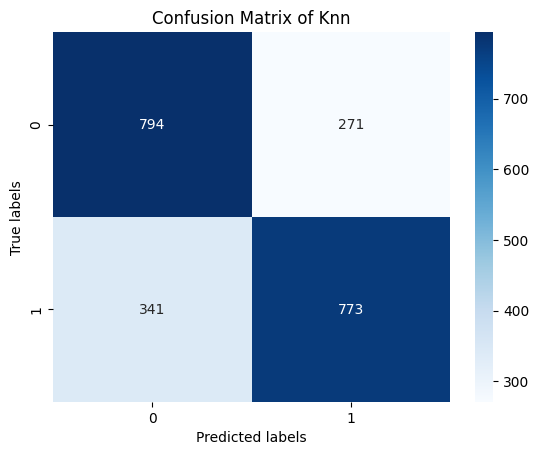

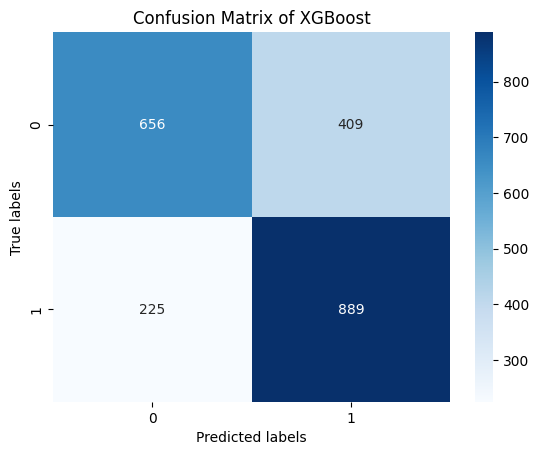

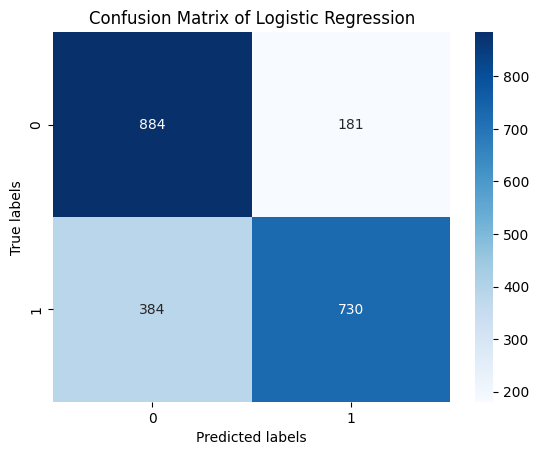

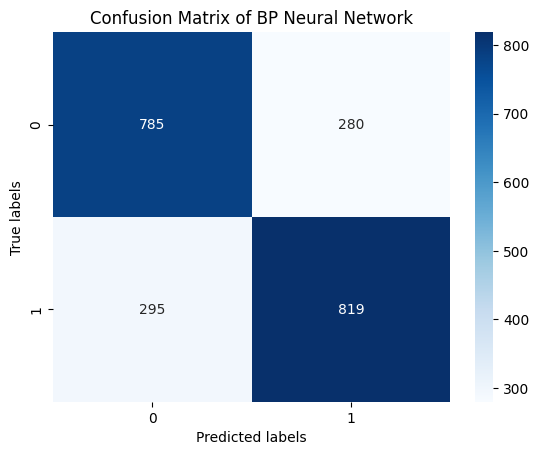

In [154]:
#绘制Knn算法的混淆矩阵
plot_confusion_matrix(test['label'],test['Knn'],'Knn')
#绘制XGB算法的混淆矩阵
plot_confusion_matrix(test['label'], test['XGB'],'XGBoost')
#绘制LR算法的混淆矩阵
plot_confusion_matrix(test['label'], test['LR'],'Logistic Regression')
#绘制MLP算法的混淆矩阵
plot_confusion_matrix(test['label'], test['MLP'],'BP Neural Network')

In [155]:
#绘制ROC曲线
from sklearn.metrics import roc_curve

def plot_roc_curve(test_labels, predicted_labels, id):
    fpr, tpr, thresholds = roc_curve(test_labels, predicted_labels)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve of '+id)
    plt.show()

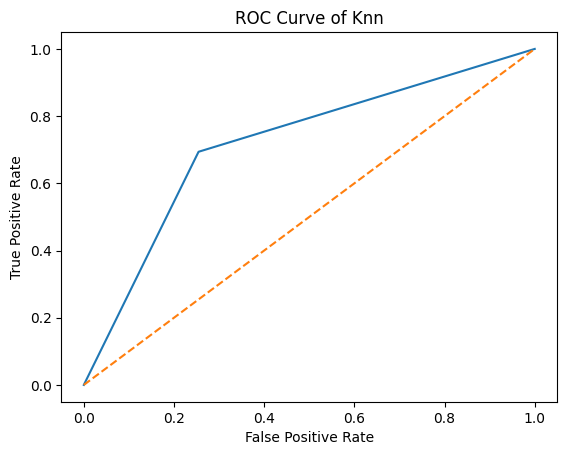

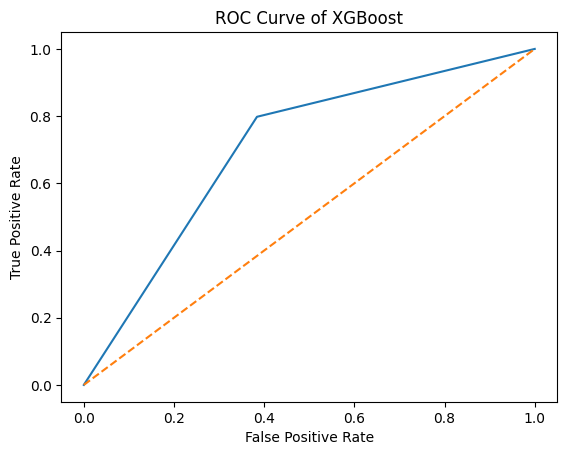

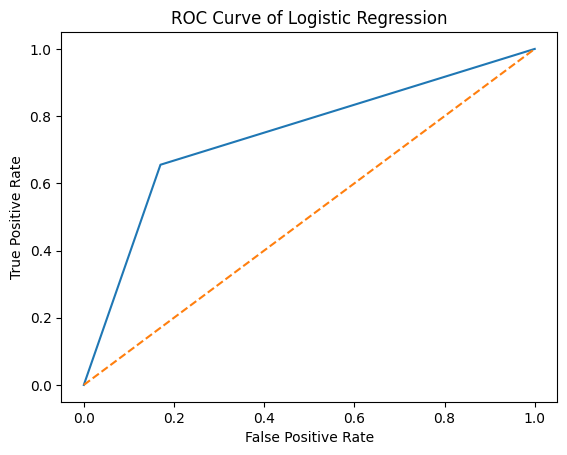

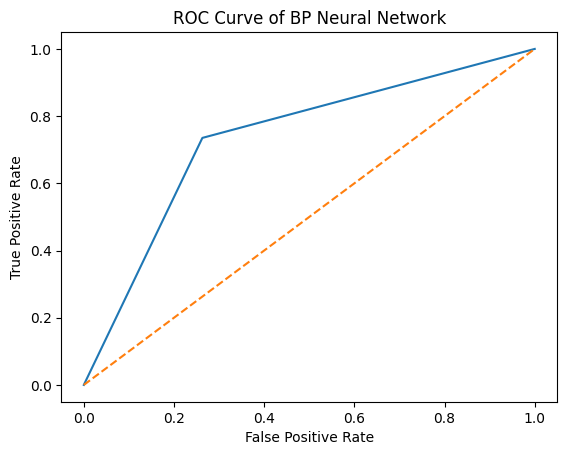

In [156]:
#绘制Knn算法的ROC曲线
plot_roc_curve(test['label'],test['Knn'],'Knn')
#绘制XGB算法的ROC曲线
plot_roc_curve(test['label'], test['XGB'],'XGBoost')
#绘制LR算法的ROC曲线
plot_roc_curve(test['label'], test['LR'],'Logistic Regression')
#绘制MLP算法的ROC曲线
plot_roc_curve(test['label'], test['MLP'],'BP Neural Network')

发现logistics回归的效果最好